<a href="https://colab.research.google.com/github/brooklynwirt/Physics-Lab/blob/main/ElectricFieldsPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

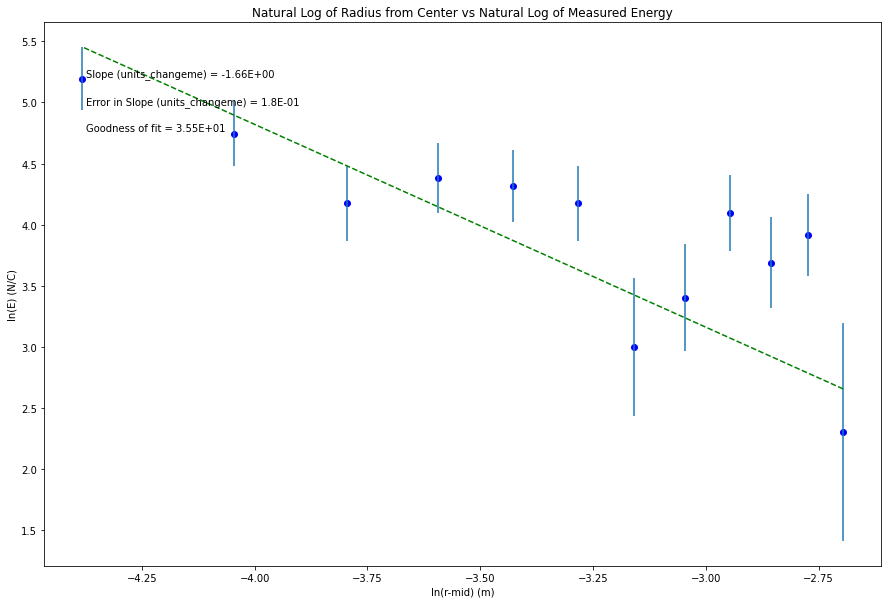

In [1]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
lnrmid = np.array([-2.695627681, -2.772588722, -2.855970331, -2.946942109, -3.047025568, -3.158251203, -3.283414346, -3.42651519, -3.593569274, -3.79423997, -4.045554398, -4.382026635]) #meters
lne = np.array([2.302585093, 3.912023005, 3.688879454, 4.094344562, 3.401197382, 2.995732274, 4.17438727, 4.317488114, 4.382026635, 4.17438727, 4.744932128, 5.192956851]) #Newtons/Coulomb


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_lne = np.array([0.892818489, 0.33642909, 0.373424502, 0.313439802, 0.43803839, 0.566144318, 0.305121325, 0.292582521, 0.28780049, 0.305121325, 0.268784677, 0.257357735])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = lnrmid   #this should be the array you want to plot on the x axis
y = lne
dy = err_lne  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(r-mid) (m)')
plt.ylabel('ln(E) (N/C)')
plt.title('Natural Log of Radius from Center vs Natural Log of Measured Energy')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()